# Import packages

In [14]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Loading data

In [15]:
## load data set 
data = pd.read_csv("seattle-weather.csv")
data.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [16]:
## make sure no missing values.

data.info() # NO missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [17]:
# Ensure 'date' is datetime
data['date'] = pd.to_datetime(data['date'])

# Data Splitting

In [18]:
# Split the data set into training and validation
split_ratio = 0.7
length_train = round(len(data) * split_ratio)
train_data = data.iloc[:length_train]
validation_data = data.iloc[length_train:]

# Display structure
print("Train data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)

Train data shape: (1023, 6)
Validation data shape: (438, 6)


In [19]:
train_data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1018,2014-10-15,8.6,16.1,11.7,4.7,rain
1019,2014-10-16,0.0,20.6,11.1,3.3,sun
1020,2014-10-17,3.3,16.7,11.7,3.0,rain
1021,2014-10-18,15.0,19.4,13.9,1.9,rain


In [20]:
validation_data

,date,precipitation,temp_max,temp_min,wind,weather
1023,2014-10-20,11.7,16.1,12.2,3.1,rain
1024,2014-10-21,1.0,16.1,11.7,4.7,rain
1025,2014-10-22,32.0,15.6,11.7,5.0,rain
1026,2014-10-23,9.4,14.4,8.3,4.6,rain
1027,2014-10-24,4.1,14.4,8.9,3.2,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Scaling the data

In [21]:

scaler = MinMaxScaler()

# Selecting features for scaling
features = ['temp_max', 'temp_min', 'precipitation', 'wind']
train_data_scaled = scaler.fit_transform(train_data[features])
validation_data_scaled = scaler.transform(validation_data[features])



# Creating sequences

In [22]:

def create_sequences(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

time_step = 5
X_train, y_train = create_sequences(train_data_scaled, time_step)
X_val, y_val = create_sequences(validation_data_scaled, time_step)


# Model

In [23]:
model = models.Sequential([
    layers.SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(time_step, len(features))),
    layers.Dropout(0.2),
    layers.SimpleRNN(50, activation='tanh', return_sequences=True),
    layers.Dropout(0.2),
    layers.SimpleRNN(50, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(len(features), activation='relu')  # Adjust activation as needed
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/50
32/32 [==============================] - 7s 43ms/step - loss: 0.1421 - val_loss: 0.1207
Epoch 2/50
32/32 [==============================] - 0s 15ms/step - loss: 0.1164 - val_loss: 0.0782
Epoch 3/50
32/32 [==============================] - 0s 16ms/step - loss: 0.0928 - val_loss: 0.0401
Epoch 4/50
32/32 [==============================] - 1s 16ms/step - loss: 0.0736 - val_loss: 0.0226
Epoch 5/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0553 - val_loss: 0.0265
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0443 - val_loss: 0.0183
Epoch 7/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0400 - val_loss: 0.0202
Epoch 8/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0332 - val_loss: 0.0188
Epoch 9/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0297 - val_loss: 0.0158
Epoch 10/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0271 - val_loss: 0.0158
Epoch 11/

# Plot - Loss over Epochs

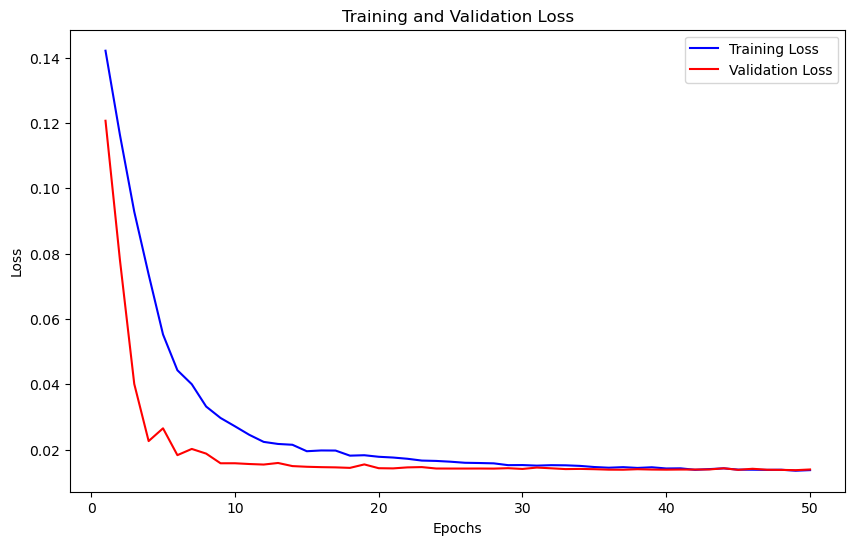

In [24]:
# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plots - Predicted vs Actual for all features - precipitation, temp_max, temp_min, wind for both training and validation sets

14/14 [==============================] - 0s 5ms/step


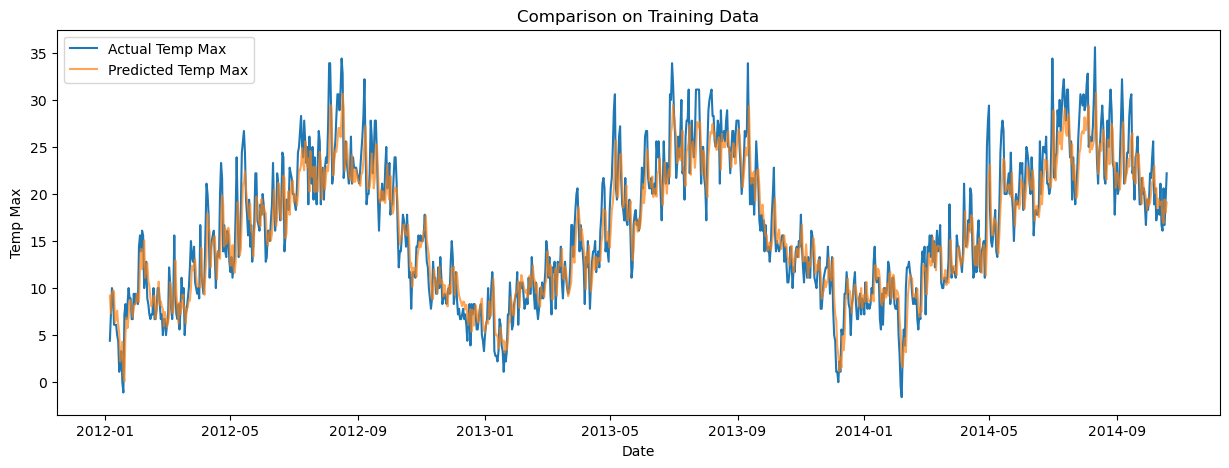

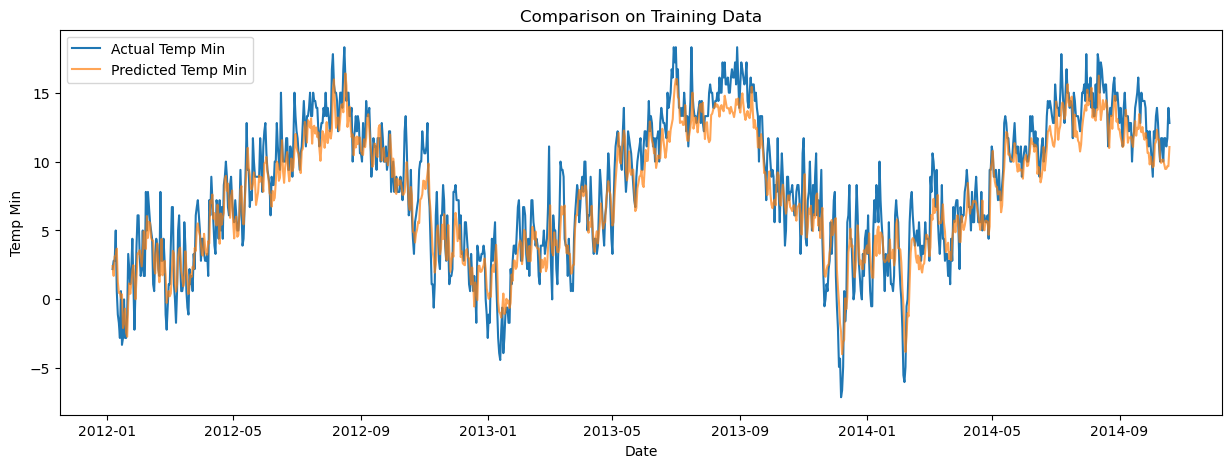

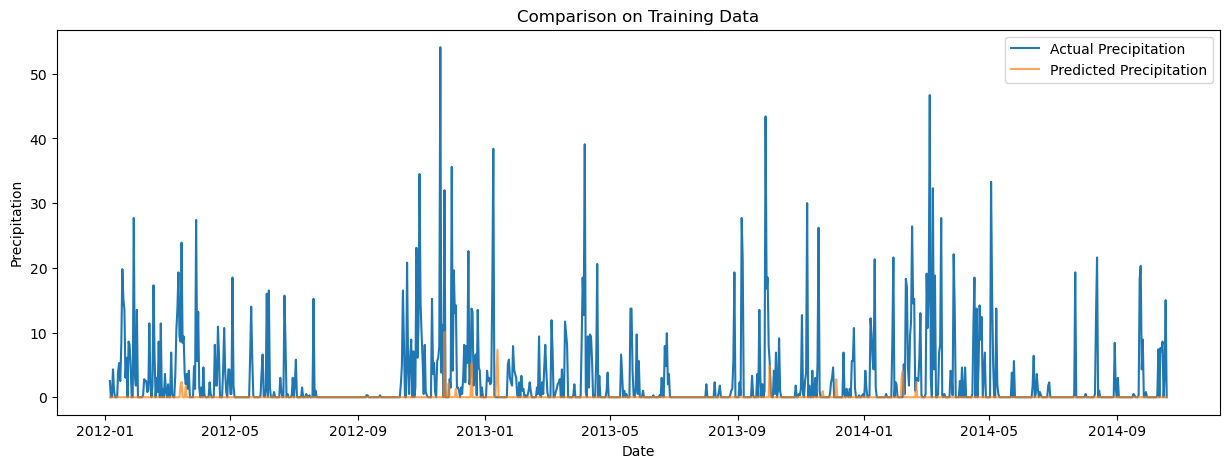

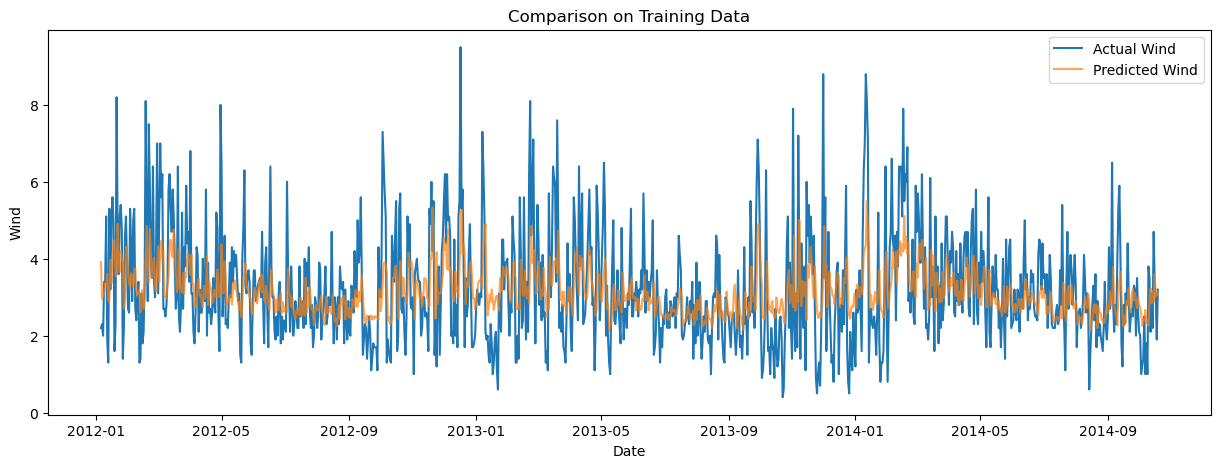

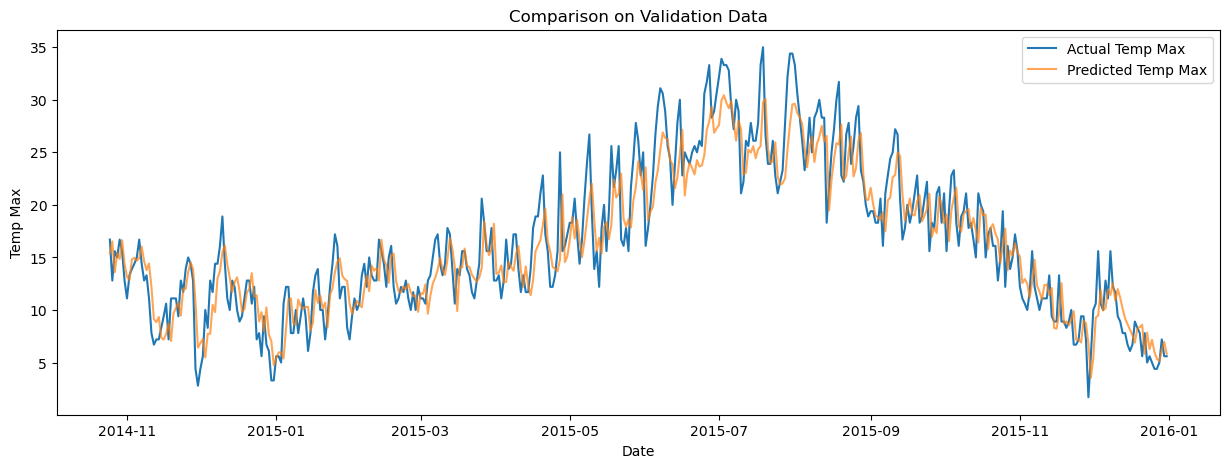

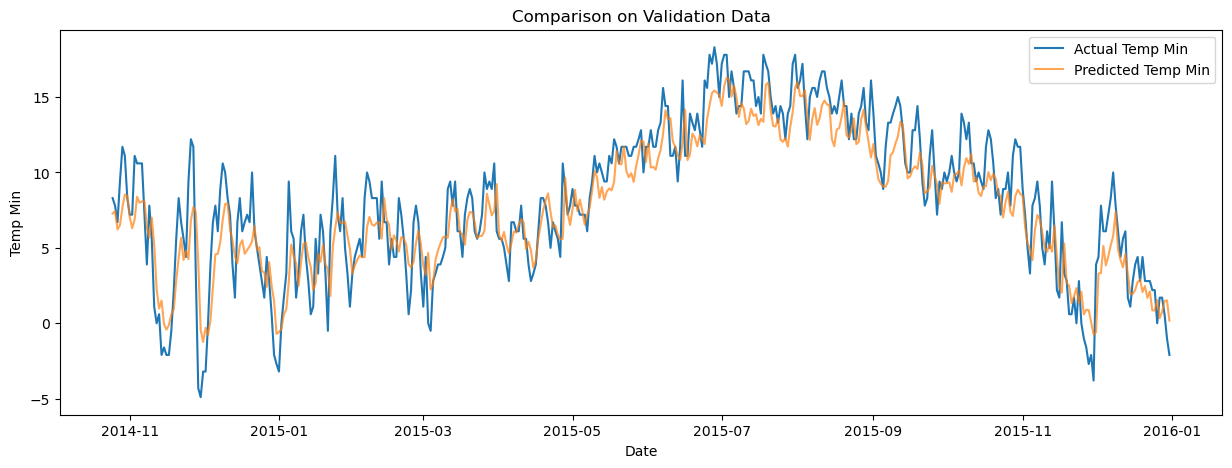

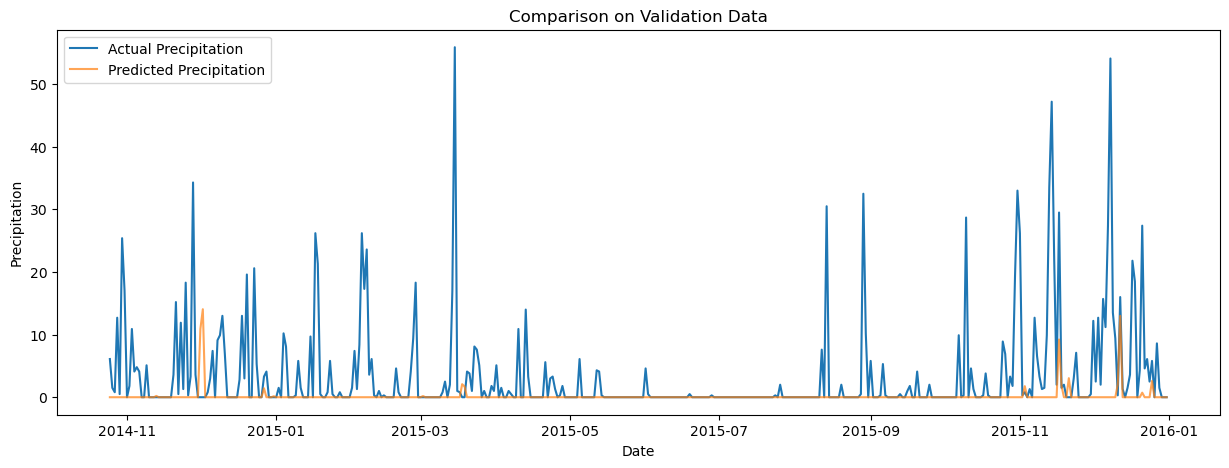

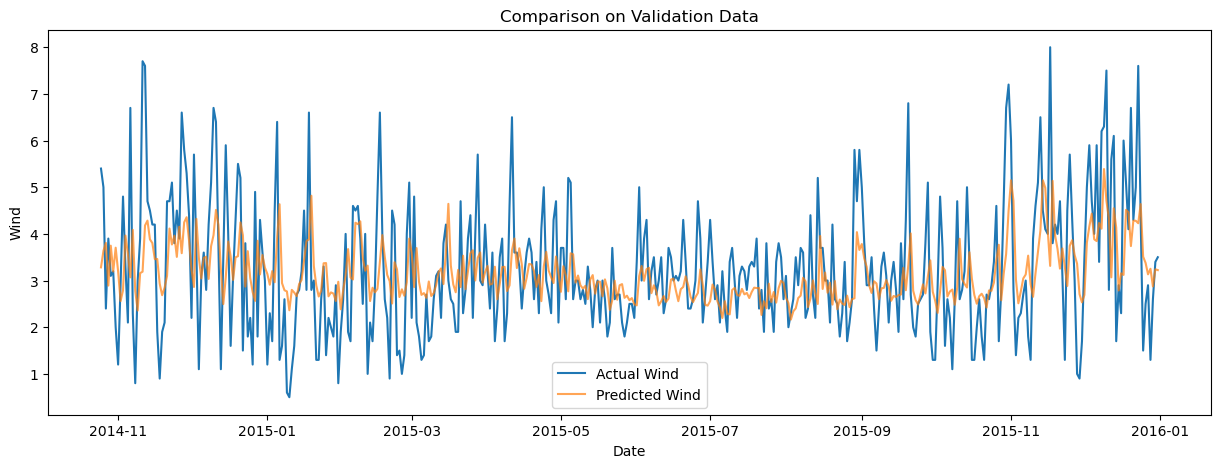

In [25]:
# Make predictions on the training data
y_pred_train = model.predict(X_train)
# Make predictions on the validation data
y_pred_val = model.predict(X_val)

# Descale the predicted data for training and validation
y_pred_train_descaled = scaler.inverse_transform(y_pred_train)
y_pred_val_descaled = scaler.inverse_transform(y_pred_val)

# Descaling the scaled actual data for training and validation sets
y_train_descaled = scaler.inverse_transform(y_train)
y_val_descaled = scaler.inverse_transform(y_val)

# Function to plot the results with actuals and predictions on the original scale
def plot_feature_comparison(dates, actuals, predictions, feature_name, title):
    plt.figure(figsize=(15, 5))
    plt.plot(dates, actuals, label=f'Actual {feature_name}')
    plt.plot(dates, predictions, label=f'Predicted {feature_name}', alpha=0.7)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(feature_name)
    plt.legend()
    plt.show()

# Training predictions and actuals
for i, feature_name in enumerate(feature_names):
    plot_feature_comparison(train_data['date'][time_step:], y_train_descaled[:, i], y_pred_train_descaled[:, i],
                            feature_name, 'Comparison on Training Data')

# Validation predictions and actuals
for i, feature_name in enumerate(feature_names):
    plot_feature_comparison(validation_data['date'][time_step:], y_val_descaled[:, i], y_pred_val_descaled[:, i],
                            feature_name, 'Comparison on Validation Data')
